In [1]:
# jupyter notebook에서 cmd 창을 실행하지 않고 필요한 라이브러리를 설치할 수 있다 => "!"를 맨 앞에 붙인 후 아래와 같이 install 시키면 된다.
# !pip install requests        # 크롤링 할 사이트에 접속해서 html문서를 읽어오는 라이브러리
# !pip install beautifulsoup4  # requests를 사용해 읽어온 html 문서를 파싱 라이브러리

In [2]:
import warnings
warnings.filterwarnings("ignore") # 반대는 warnings.filterwarnings("defailt")
from IPython.display import Image

In [3]:
import requests
from bs4 import BeautifulSoup

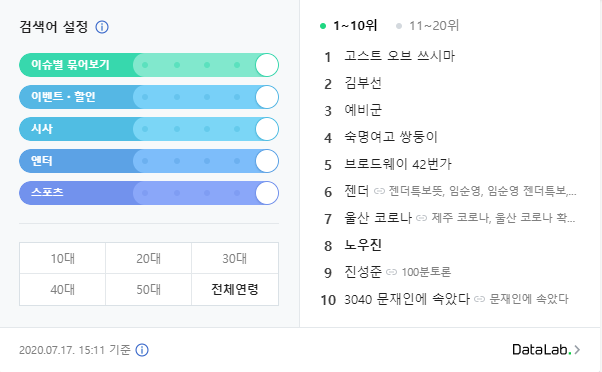

In [4]:
Image("./네이버실시간급상승검색어.PNG", width = 700)

In [5]:
'''
# 기존에 사용하던 네이버 실시간 급상승 검색어 크롤링 => 사용할 수 없다.
request = requests.get("https://www.naver.com/")
# print(request) # <Response [200]> => 타겟 사이트에 정상적으로 접속해서 웹 페이지 정보를 얻어왔다

# 타겟 사이트에서 읽어온 내용 중에서 html 태그(text)만 얻어온다.
html = request.text
# print(html)
# BeautifulSoup 모듈의 BeautifulSoup() 함수를 사용해서 html 문서를 파싱할 준비를 한다.
soup = BeautifulSoup(html, "html.parser")
print(soup)
'''
pass

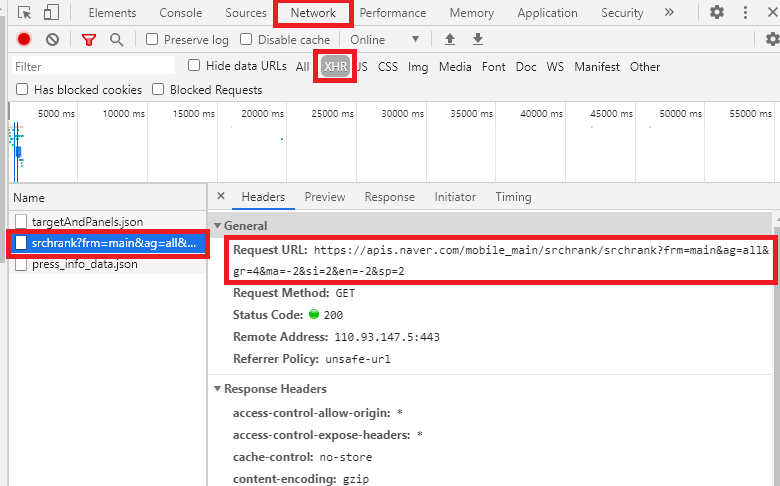

In [6]:
# 네이버 실시간 검색어 크롤링
# 2020년 3월 네이버 실시간 검색어를 크롤링하는 방법이 변경되었다.
# 실시간 검색어가 웹 페이지에 포함되어있지 않고 ajax를 이용해 받아오는 방식을 사용한다.
# request 모듈의 get() 메소드를 사용해서 실시간 검색어를 json으로 받는다.
request = requests.get("https://apis.naver.com/mobile_main/srchrank/srchrank?frm=main&ag=all&gr=4&ma=-2&si=2&en=-2&sp=2")
# 개발자 모드(크롬에서 F12)에서 아래 그림처럼 Network => XHR(ajax) => srchrank 클릭 => RequestURL 복사
Image("./네이버실시간급상승검색어2.PNG", width = 700)

In [7]:
# 실시간 검색어를 저장한다.
words = request.text
print(words)
print(type(words))

{"ts":"2020-07-17T16:30:00+0900","sm":"agallgrpmamsipenmspp","rop":[{"ag":"all"},{"gr":"04"},{"ma":"-2"},{"si":"02"},{"en":"-2"},{"sp":"02"}],"data":[{"rank":1,"keyword":"3040 문재인에 속았다","keyword_synonyms":["문재인에 속았다"]},{"rank":2,"keyword":"진성준","keyword_synonyms":["100분토론"]},{"rank":3,"keyword":"의정부 날씨","keyword_synonyms":["포천 날씨","일요일 날씨"]},{"rank":4,"keyword":"우종창","keyword_synonyms":[]},{"rank":5,"keyword":"정원석","keyword_synonyms":[]},{"rank":6,"keyword":"제주 코로나","keyword_synonyms":["제주도 코로나","제주도 확진자","울산 코로나","울산시청"]},{"rank":7,"keyword":"배준환","keyword_synonyms":[]},{"rank":8,"keyword":"젠더특보뜻","keyword_synonyms":["임순영","임순영 젠더특보","젠더"]},{"rank":9,"keyword":"제헌절","keyword_synonyms":["7월17일"]},{"rank":10,"keyword":"문재인 신발","keyword_synonyms":[]},{"rank":11,"keyword":"강동구 산후조리원","keyword_synonyms":[]},{"rank":12,"keyword":"이만희","keyword_synonyms":[]},{"rank":13,"keyword":"송파구 블로그","keyword_synonyms":["송파구청"]},{"rank":14,"keyword":"네이버 실검순위","keyword_synonyms":[]},{"rank":15,"keyword"

In [8]:
# json 문자열 형태로 얻어온 실시간 급상승 검색어를 딕셔너리로 변환시키기 위해 json 모듈을 import 한다
import json

In [9]:
# json 모듈의 loads() 메소드를 사용해서 문자열로 되어있는 json 데이터를 파이썬에서 사용하기 위해 딕셔너리 타입으로 변환한다.
words_json = json.loads(words)
print(type(words_json))
print(words_json.keys())
print(words_json)


<class 'dict'>
dict_keys(['ts', 'sm', 'rop', 'data'])
{'ts': '2020-07-17T16:30:00+0900', 'sm': 'agallgrpmamsipenmspp', 'rop': [{'ag': 'all'}, {'gr': '04'}, {'ma': '-2'}, {'si': '02'}, {'en': '-2'}, {'sp': '02'}], 'data': [{'rank': 1, 'keyword': '3040 문재인에 속았다', 'keyword_synonyms': ['문재인에 속았다']}, {'rank': 2, 'keyword': '진성준', 'keyword_synonyms': ['100분토론']}, {'rank': 3, 'keyword': '의정부 날씨', 'keyword_synonyms': ['포천 날씨', '일요일 날씨']}, {'rank': 4, 'keyword': '우종창', 'keyword_synonyms': []}, {'rank': 5, 'keyword': '정원석', 'keyword_synonyms': []}, {'rank': 6, 'keyword': '제주 코로나', 'keyword_synonyms': ['제주도 코로나', '제주도 확진자', '울산 코로나', '울산시청']}, {'rank': 7, 'keyword': '배준환', 'keyword_synonyms': []}, {'rank': 8, 'keyword': '젠더특보뜻', 'keyword_synonyms': ['임순영', '임순영 젠더특보', '젠더']}, {'rank': 9, 'keyword': '제헌절', 'keyword_synonyms': ['7월17일']}, {'rank': 10, 'keyword': '문재인 신발', 'keyword_synonyms': []}, {'rank': 11, 'keyword': '강동구 산후조리원', 'keyword_synonyms': []}, {'rank': 12, 'keyword': '이만희', 'keyword_s

In [11]:
# 딕셔너리에 실시간 급상승 검색어만 얻어온다. => 리스트 타입의 데이터가 얻어진다.
ranks = words_json.get("data")
# rank = words_json.get["data"]
# print(type(ranks))
# print(ranks)
# 실시간 검색어가 저장된 리스트에는 검색어 순위별로 각각 딕셔너리 타입으로 저장되어 있다.

for rank in ranks:
    print("{0:2d} : {1} => {2}".format(rank["rank"], rank["keyword"], rank["keyword_synonyms"]))
    

 1 : 3040 문재인에 속았다 => ['문재인에 속았다']
 2 : 진성준 => ['100분토론']
 3 : 의정부 날씨 => ['포천 날씨', '일요일 날씨']
 4 : 우종창 => []
 5 : 정원석 => []
 6 : 제주 코로나 => ['제주도 코로나', '제주도 확진자', '울산 코로나', '울산시청']
 7 : 배준환 => []
 8 : 젠더특보뜻 => ['임순영', '임순영 젠더특보', '젠더']
 9 : 제헌절 => ['7월17일']
10 : 문재인 신발 => []
11 : 강동구 산후조리원 => []
12 : 이만희 => []
13 : 송파구 블로그 => ['송파구청']
14 : 네이버 실검순위 => []
15 : 강원랜드 개장 => []
16 : 피라맥스 => []
17 : 예비군 훈련 => ['예비군']
18 : 미코 => []
19 : 진매트릭스 => []
20 : 신천지 => []
